# Keltner channels

Keltner channels has a thinner volatility than Bollinger band.  
  
It has 3 lines:  
  
Middle Line: 20-day exponential moving average  
Upper Channel Line: 20-day EMA + (2 x ATR(10))  
Lower Channel Line: 20-day EMA - (2 x ATR(10)) 
  
Trading view uses KC(20,1) with 20-day EMA and 


he True Range is the largest of the following:

The Current Period High minus (-) Current Period Low
The Absolute Value (abs) of the Current Period High minus (-) The Previous Period Close
The Absolute Value (abs) of the Current Period Low minus (-) The Previous Period Close

true range=max[(high - low), abs(high - previous close), abs (low - previous close)]

*Absolute Value is used because the ATR does not measure price direction, only volatility. 
Therefore there should be no negative numbers.

*Once you have the True Range, the Average True Range can be plotted. 
The ATR is an Exponential Moving Average of the True Range.

## 1. Prepare candlesticks

Copied from other notebooks

In [4]:
# libraries
import urllib.request as r
import json
import pandas as pd
import numpy as np
import matplotlib as plt
# candlestick
from mpl_finance import candlestick2_ochl
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [5]:
# Get data for a single crypto e.g. BTT in BNB market
base = 'https://api.binance.com'
ticker24 = '/api/v1/ticker/24hr'
candlestick = '/api/v1/klines'
params = '?symbol=WANBNB&interval=1d'
# for Bollinger bands 20 day
bb_params = '?symbol=BTTBNB&interval=12h'
httpRes = r.urlopen(base + candlestick + params)
data = json.load(httpRes)

In [6]:
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades','Taker buy base asset volume','Taker buy quote asset volume','ignore']
df = pd.DataFrame(data, columns=columns)
original_data = df;

In [7]:
# change default precision of decimals
pd.set_option("display.precision", 8)
# clean and parse data
dateFormat = '%d/%m/%Y'
# df.drop('ignore', axis=1, inplace=True)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
df[['Open', 'High', 'Low', 'Close', 'Taker buy quote asset volume']] = df[['Open', 'High', 'Low', 'Close', 'Taker buy quote asset volume']].apply(lambda x: x.astype(float))
df[['Volume', 'Taker buy base asset volume']] = df[['Volume', 'Taker buy base asset volume']].apply(lambda x: x.astype(float))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 12 columns):
Open time                       354 non-null datetime64[ns]
Open                            354 non-null float64
High                            354 non-null float64
Low                             354 non-null float64
Close                           354 non-null float64
Volume                          354 non-null float64
Close time                      354 non-null datetime64[ns]
Quote asset volume              354 non-null object
Number of trades                354 non-null int64
Taker buy base asset volume     354 non-null float64
Taker buy quote asset volume    354 non-null float64
ignore                          354 non-null object
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
## Plot candlestick
pd.options.mode.chained_assignment = None

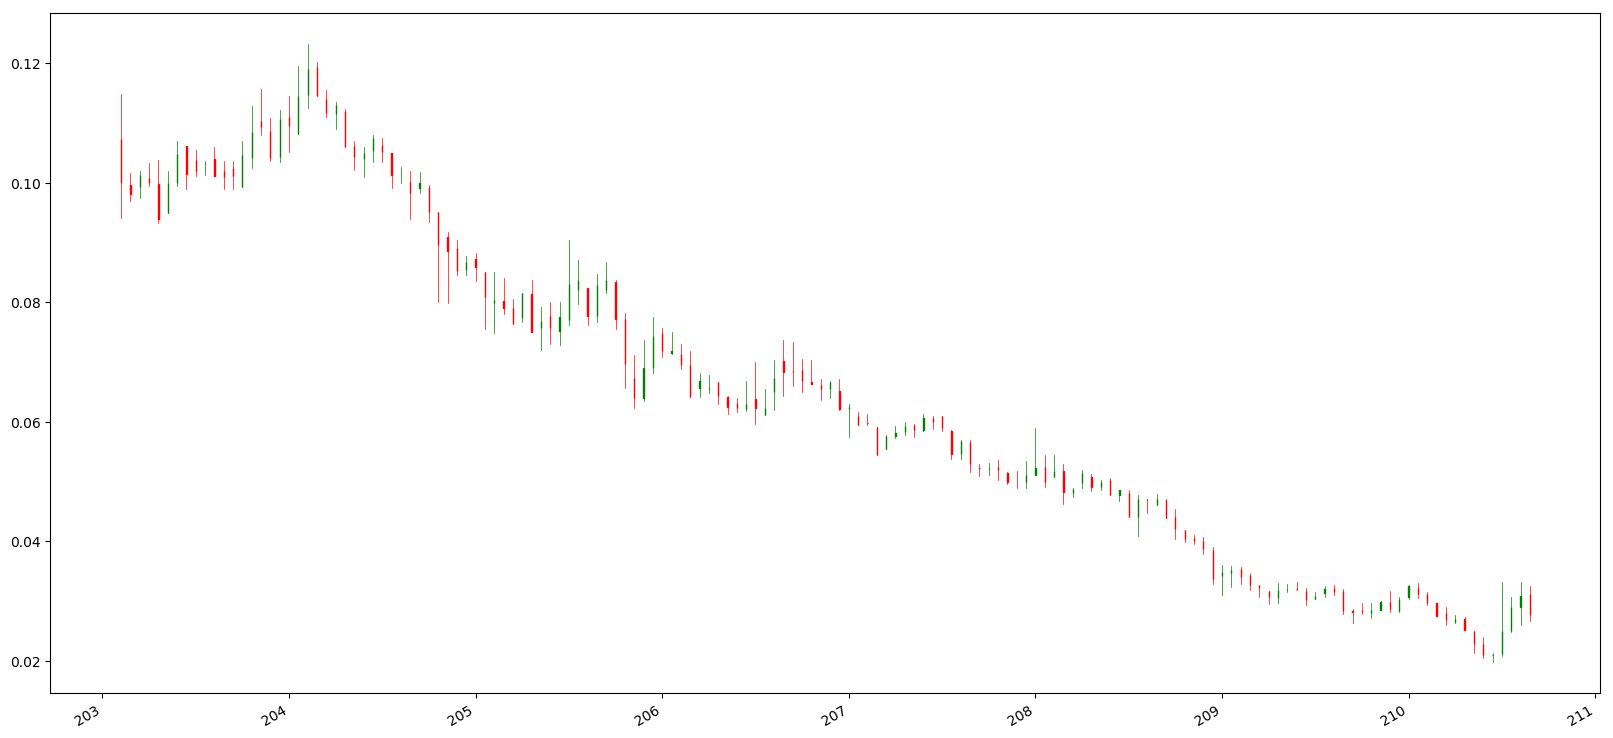

In [9]:
ohlc_df = df[['Open time', 'Open', 'High', 'Low', 'Close', 'Close time', 'Volume']]
# ohlc_df['Close time'] = mdates.date2num(ohlc_df['Close time'])
# ohlc_df.set_index('Close time', inplace=True)
zoom = ohlc_df.loc['2019-02-02': , :]
quotes = zip(zoom.index, zoom['Open'], zoom['High'], zoom['Low'], zoom['Close'])
fig, ax = plt.subplots(figsize=(20,10), dpi=100, facecolor='w', edgecolor='k')
candlestick_ohlc(ax, quotes, width=0.03, colorup='g')
ax.set_xticklabels(zoom.index,rotation=45, horizontalalignment='right')
fig.autofmt_xdate()

## Ketlner channels data

1. Get TR1, TR2, TR3
2. Get Max of All TR
3. Get ATR
4. Get 20-day EMA
5. Calculate envelopes

highest of the following:  

Method 1: Current High less the current Low  
Method 2: Current High less the previous Close (absolute value)  
Method 3: Current Low less the previous Close (absolute value)  

Current ATR = [(Prior ATR x 13) + Current TR] / 14

  - Multiply the previous 14-day ATR by 13.
  - Add the most recent day's TR value.
  - Divide the total by 14
  
Basis = 20 Period EMA

Upper Envelope = 20 Period EMA + (2 X ATR)

Lower Envelope = 20 Period EMA - (2 X ATR)

In [14]:
ohlc_df['TR1'] = ohlc_df['High'] - ohlc_df['Low']
ohlc_df['TR2'] = (ohlc_df['High'] - ohlc_df['Close'].shift()).abs()
ohlc_df['TR3'] = (ohlc_df['Low'] - ohlc_df['Close'].shift()).abs()
highest = ohlc_df[['TR1', 'TR2', 'TR3']].max(axis=1)
ohlc_df['Current TR'] = pd.Series(highest, index=ohlc_df.index)
ohlc_df['ATR'] = ohlc_df['Current TR'].rolling(window=14).mean()
ohlc_df.head(20)

,Open time,Open,High,Low,Close,Close time,Volume,TR1,TR2,TR3,Current TR,ATR
0,2018-03-23,0.50000,1.00000,0.18700,0.36354,2018-03-23 23:59:59.999,622886.25,0.81300,NaN,NaN,0.81300,NaN
1,2018-03-24,0.36317,0.43599,0.29405,0.31375,2018-03-24 23:59:59.999,162267.13,0.14194,0.07245,0.06949,0.14194,NaN
2,2018-03-25,0.31373,0.33918,0.29765,0.32298,2018-03-25 23:59:59.999,67386.98,0.04153,0.02543,0.01610,0.04153,NaN
3,2018-03-26,0.32298,0.33500,0.30084,0.31046,2018-03-26 23:59:59.999,95389.62,0.03416,0.01202,0.02214,0.03416,NaN
4,2018-03-27,0.31061,0.31613,0.28757,0.29889,2018-03-27 23:59:59.999,71775.31,0.02856,0.00567,0.02289,0.02856,NaN
5,2018-03-28,0.29471,0.29640,0.27653,0.29338,2018-03-28 23:59:59.999,74070.02,0.01987,0.00249,0.02236,0.02236,NaN
6,2018-03-29,0.29737,0.31000,0.27258,0.28488,2018-03-29 23:59:59.999,63934.18,0.03742,0.01662,0.02080,0.03742,NaN
7,2018-03-30,0.28756,0.32950,0.28200,0.31251,2018-03-30 23:59:59.999,85026.78,0.04750,0.04462,0.00288,0.04750,NaN
8,2018-03-31,0.31250,0.33283,0.29195,0.29637,2018-03-31 23:59:59.999,102525.59,0.04088,0.02032,0.02056,0.04088,NaN
9,2018-04-01,0.29327,0.29375,0.27258,0.27897,2018-04-01 23:59:59.999,43678.06,0.02117,0.00262,0.02379,0.02379,NaN


In [59]:
ohlc_df['20-day EMA'] = ohlc_df['Close'].rolling(window=20).mean()
ohlc_df['Upper'] = ohlc_df['20-day EMA'] + (2*ohlc_df['ATR'])
ohlc_df['Lower'] = ohlc_df['20-day EMA'] - (2*ohlc_df['ATR'])
ohlc_df.dropna(inplace=True)
ohlc_df.tail()

,Open time,Open,High,Low,Close,Close time,Volume,TR1,TR2,TR3,Current TR,ATR,20-day EMA,Upper,Lower
349,2019-03-07,0.02088,0.02126,0.01977,0.02097,2019-03-07 23:59:59.999,81972.0,0.00149,0.00033,0.00116,0.00149,0.00251000,0.0280225,0.03304250,0.02300250
350,2019-03-08,0.02115,0.03310,0.02073,0.02502,2019-03-08 23:59:59.999,702346.7,0.01237,0.01213,0.00024,0.01237,0.00321643,0.0277315,0.03416436,0.02129864
351,2019-03-09,0.02489,0.03062,0.02471,0.02891,2019-03-09 23:59:59.999,1016544.6,0.00591,0.00560,0.00031,0.00591,0.00353214,0.0275770,0.03464129,0.02051271
352,2019-03-10,0.02891,0.03314,0.02591,0.03080,2019-03-10 23:59:59.999,722090.1,0.00723,0.00423,0.00300,0.00723,0.00380643,0.0275430,0.03515586,0.01993014
353,2019-03-11,0.03114,0.03254,0.02667,0.02769,2019-03-11 23:59:59.999,653114.6,0.00587,0.00174,0.00413,0.00587,0.00403571,0.0275095,0.03558093,0.01943807


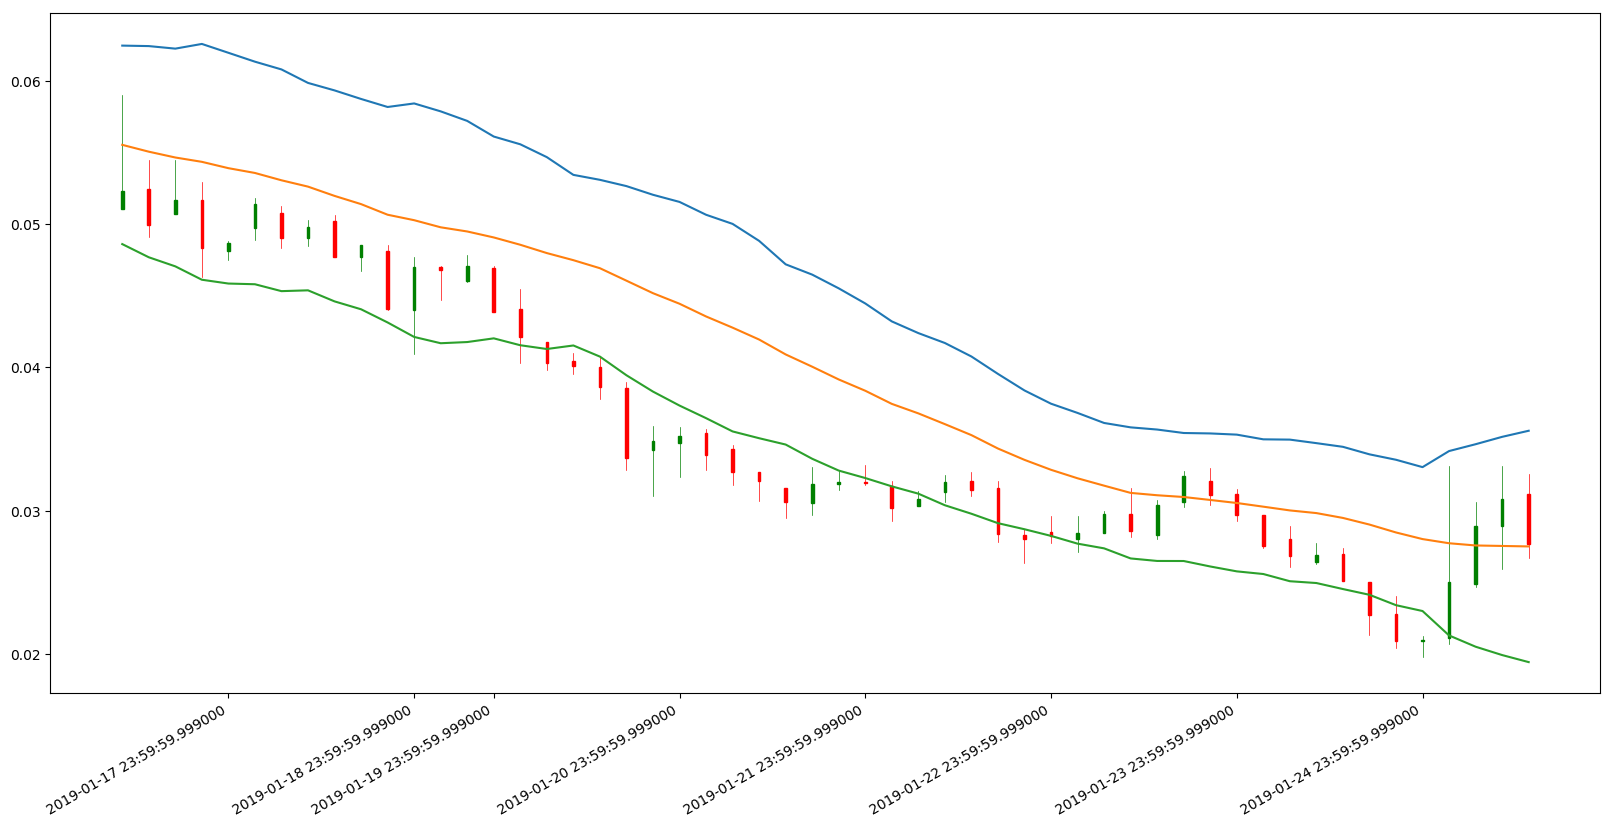

In [64]:
ohlc_df = ohlc_df.loc[300 :, :]
quotes = zip(ohlc_df['Close time'].apply(mdates.date2num), ohlc_df['Open'], ohlc_df['High'], ohlc_df['Low'], ohlc_df['Close'])
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
candlestick_ohlc(ax, quotes, width=0.1, colorup='g')
ax.plot(ohlc_df['Close time'], ohlc_df['Upper'])
ax.plot(ohlc_df['Close time'], ohlc_df['20-day EMA'])
ax.plot(ohlc_df['Close time'], ohlc_df['Lower'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
# ax.set_xlim('2019-01-01', '2019-03-03')
ax.set_xticklabels(ohlc_df['Close time'],rotation=45, horizontalalignment='right')
fig.autofmt_xdate()